### **Importamos las librerias que usaremos durante el resto del EDA**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sys
# Para ignorar advertencias y que el codigo quede mas limpio
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

Cargamos los datasets correspondientes

In [3]:
historico_velocidad         = pd.read_csv("./_src/datasets/historico_velocidad_internet_prov.csv") 
accesos_por_tecnologia_prov = pd.read_csv("./_src/datasets/Internet_Accesos-por-tecnologia_prov.csv",dtype={"Wireless":str,"Otros":str})
accesos_por_tecnologia      = pd.read_csv("./_src/datasets/Internet_Accesos-por-tecnologia.csv",dtype={"Wireless":str,"Otros":str})
accesos_por_velocidad       = pd.read_csv("./_src/datasets/Internet_Accesos-por-velocidad.csv",dtype=str)
internet_ingresos           = pd.read_csv("./_src/datasets/Internet_Ingresos.csv")
internet_penetracion        = pd.read_csv("./_src/datasets/Internet_Penetracion.csv")

## **Observemos información crucial sobre las columnas y el tipo de datos que contienen, así como la cantidad de registros no nulos presentes de cada uno de los datasets**

### Historico velocidad

In [14]:
historico_velocidad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Año                     840 non-null    int64  
 1   Trimestre               840 non-null    int64  
 2   Provincia               840 non-null    object 
 3   Mbps (Media de bajada)  840 non-null    int64  
 4   Unnamed: 4              0 non-null      float64
 5   Unnamed: 5              0 non-null      float64
dtypes: float64(2), int64(3), object(1)
memory usage: 39.5+ KB


In [15]:
historico_velocidad.head()

,Año,Trimestre,Provincia,Mbps (Media de bajada),Unnamed: 4,Unnamed: 5
0,2022,3,Buenos Aires,70,NaN,NaN
1,2022,3,Capital Federal,101,NaN,NaN
2,2022,3,Catamarca,61,NaN,NaN
3,2022,3,Chaco,53,NaN,NaN
4,2022,3,Chubut,16,NaN,NaN


Notemos que tenemos 2 columnas totalmente irrelevantes por lo que procedemos a eliminarlas.

In [16]:
historico_velocidad.drop(columns=["Unnamed: 4","Unnamed: 5"],inplace=True)

Corroboramos que no tenga ningun defecto las otras columnas

In [17]:
print(historico_velocidad["Año"].unique())
print(historico_velocidad["Trimestre"].unique())
print(historico_velocidad["Provincia"].unique())

[2022 2021 2020 2019 2018 2017 2016 2015 2014]
[3 2 1 4]
['Buenos Aires' 'Capital Federal' 'Catamarca' 'Chaco' 'Chubut' 'Córdoba'
 'Corrientes' 'Entre Ríos' 'Formosa' 'Jujuy' 'La Pampa' 'La Rioja'
 'Mendoza' 'Misiones' 'Neuquén' 'Río Negro' 'Salta' 'San Juan' 'San Luis'
 'Santa Cruz' 'Santa Fe' 'Santiago Del Estero' 'Tierra Del Fuego'
 'Tucumán']


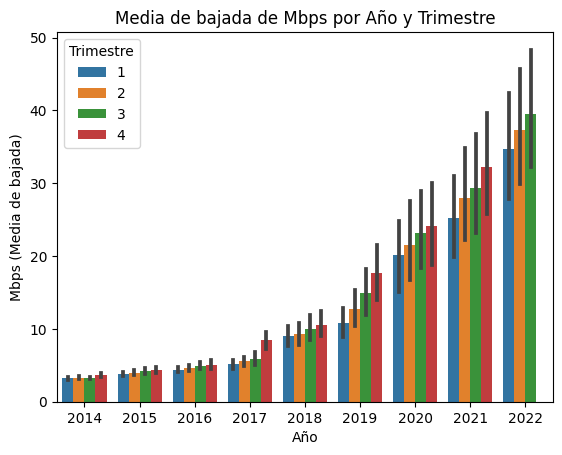

In [112]:
# Gráfico de barras agrupadas en Seaborn
sns.barplot(data=historico_velocidad, x='Año', y='Mbps (Media de bajada)', hue='Trimestre')
plt.xlabel('Año')
plt.ylabel('Mbps (Media de bajada)')
plt.title('Media de bajada de Mbps por Año y Trimestre')
plt.show()

Se observa un aumento anual constante en la media de descarga de Mbps, indicando una creciente preferencia de los usuarios por servicios de telecomunicaciones más avanzados. Esto sugiere una mayor demanda de soluciones tecnológicas de alta velocidad y mayor calidad, que se empezó a notar especialmente alrededor del año 2018.

In [19]:
# historico_velocidad.to_csv("./_src/datasets_pbi/historico_velocidad_prov.csv",index=False)

### accesos_por_tecnologia

In [168]:
accesos_por_tecnologia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Año           35 non-null     int64 
 1   Trimestre     35 non-null     int64 
 2   ADSL          35 non-null     object
 3   Cablemodem    35 non-null     object
 4   Fibra óptica  35 non-null     object
 5   Wireless      35 non-null     object
 6   Otros         35 non-null     object
 7   Total         35 non-null     object
 8   Periodo       35 non-null     object
dtypes: int64(2), object(7)
memory usage: 2.6+ KB


In [169]:
accesos_por_tecnologia.head()

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Periodo
0,2022,3,1.395.277,6.031.970,2.871.541,557.110,235.230,11.091.128,Jul-Sept 2022
1,2022,2,1.468.333,5.979.214,2.723.285,556.243,231.609,10.958.684,Abr-Jun 2022
2,2022,1,1.533.240,6.073.426,2.219.533,545.814,251.996,10.624.009,Ene-Mar 2022
3,2021,4,1.657.615,5.984.240,2.072.236,523.107,252.596,10.489.794,Oct-Dic 2021
4,2021,3,1.950.631,5.826.257,1.566.048,492.415,250.190,10.085.541,Jul-Sept 2021


Notemos 3 aspectos importantes:
1. La columna `Periodo` ya esta separada por `Año` y `Trimestre`, por lo que la eliminamos
2. Notemos que las columnas numericas que son referentes a las tecnologias, estan expresadas en el rango de miles a millones, sin embargo estan erroneamente con los puntos por lo se "leen" de forma incorrecta
3. La columna `Otros` no nos es relevante para el analisis


In [8]:
# Creamos una funcion generalizada para transformar columnas a valor numerico
def transform_to_numeric(dataset,columnas):
    for columna in columnas:
        dataset[columna] = dataset[columna].str.replace(".","")
        dataset[columna] = pd.to_numeric(dataset[columna])
    return dataset

In [196]:
accesos_por_tecnologia.drop(columns=["Periodo","Otros"],inplace=True)
columnas = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Total']
accesos_por_tecnologia = transform_to_numeric(accesos_por_tecnologia,columnas)

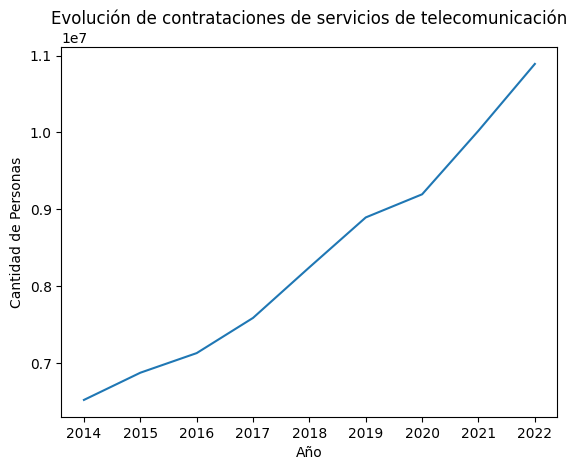

In [197]:
# Gráfico de línea en Seaborn
sns.lineplot(data=accesos_por_tecnologia, x='Año', y='Total',ci=None)
plt.xlabel('Año')
plt.ylabel('Cantidad de Personas')
plt.title('Evolución de contrataciones de servicios de telecomunicación')
plt.show()

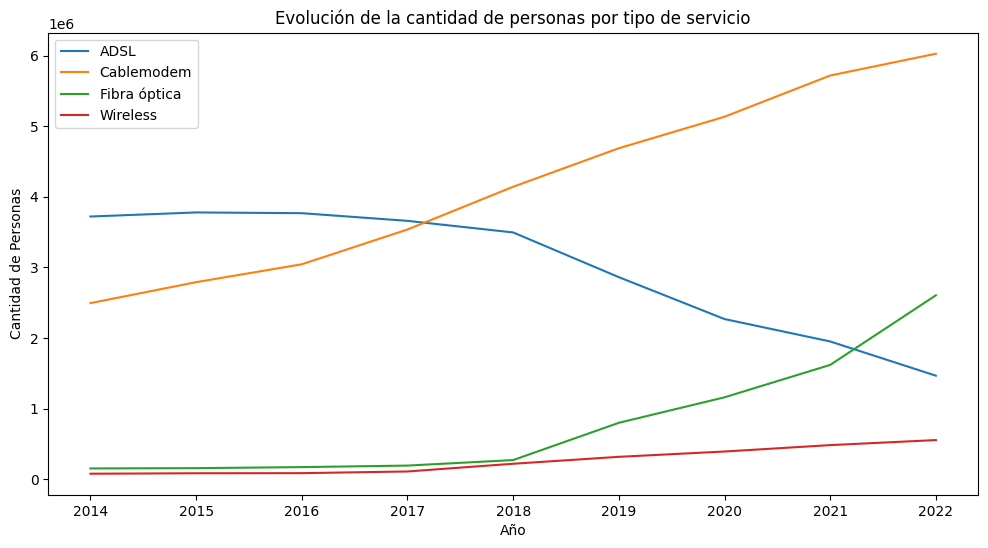

In [193]:
tipo_de_servicios = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless']
plt.figure(figsize=(12,6))
for i in tipo_de_servicios:    
    sns.lineplot(data=accesos_por_tecnologia, x='Año', y=i,label=i,ci=None)
plt.xlabel('Año')
plt.ylabel('Cantidad de Personas')
plt.title('Evolución de la cantidad de personas por tipo de servicio')
plt.legend()
plt.show()

La tendencia previamente descrita se acentúa notoriamente en este gráfico, especialmente en tecnologías como **_`Cablemodem`_ y**, de manera más destacada, en **_`Fibra Óptica`_**, que experimentó un significativo crecimiento en los últimos años un notable aumento en su adopción y preferencia por parte de los usuarios. 

Al igual que antes, a partir del año 2018, se observa un declive en tecnologías más antiguas como `ADSL`, mientras que tecnologías avanzadas experimentaron un crecimiento notorio.

In [174]:
# accesos_por_tecnologia.to_csv("./_src/datasets_pbi/accesos_por_tecnologia.csv",index=False)

### accesos_por_tecnologia_prov

Este dataset tiene un proceso muy similar al anterior

In [3]:
accesos_por_tecnologia_prov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 841 entries, 0 to 840
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Año           841 non-null    object
 1   Trimestre     841 non-null    object
 2   Provincia     840 non-null    object
 3   ADSL          840 non-null    object
 4   Cablemodem    840 non-null    object
 5   Fibra óptica  840 non-null    object
 6   Wireless      840 non-null    object
 7   Otros         840 non-null    object
 8   Total         840 non-null    object
dtypes: object(9)
memory usage: 59.3+ KB


In [4]:
accesos_por_tecnologia_prov.head()

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2022,3,Buenos Aires,339.648,2.748.325,1.436.433,126.846,70.416,4.721.668
1,2022,3,Capital Federal,140.791,1.240.125,129.218,5.758,31.787,1.547.679
2,2022,3,Catamarca,10.010,10.495,46.224,1.329,2.235,70.293
3,2022,3,Chaco,27.164,61.800,44.645,8.178,2.359,144.146
4,2022,3,Chubut,45.377,72.212,9.574,29.784,8.831,165.778


In [18]:
accesos_por_tecnologia_prov["Trimestre"].unique()

array(['3', '2', '1', '4', '3 *', '2 *', '1 *',
       'Los datos provinciales no coinciden a nivel nacional, ya que se rincorporó información que no contien apertuta a nivel geográfico.'],
      dtype=object)

In [19]:
accesos_por_tecnologia_prov["Año"].unique()

array(['2022', '2021', '2020', '2019', '2019 *', '2018', '2017', '2016',
       '2015', '2014', '*'], dtype=object)

In [20]:
accesos_por_tecnologia_prov[accesos_por_tecnologia_prov["Año"] == '*']

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
840,*,Los datos provinciales no coinciden a nivel na...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Eliminamos la columna Otros y la ultima fila 

In [5]:
accesos_por_tecnologia_prov.drop([840],inplace=True)
accesos_por_tecnologia_prov.drop(columns="Otros",inplace=True)

In [6]:
accesos_por_tecnologia_prov["Trimestre"] = accesos_por_tecnologia_prov["Trimestre"].str.replace(" *","")
accesos_por_tecnologia_prov["Trimestre"] = accesos_por_tecnologia_prov["Trimestre"].str.replace("*","")
accesos_por_tecnologia_prov["Año"] = accesos_por_tecnologia_prov["Año"].str.replace(" *","")
accesos_por_tecnologia_prov["Año"] = accesos_por_tecnologia_prov["Año"].str.replace("*","")

In [7]:
accesos_por_tecnologia_prov["Trimestre"].unique()

array(['3', '2', '1', '4'], dtype=object)

In [8]:
accesos_por_tecnologia_prov["Año"].unique()

array(['2022', '2021', '2020', '2019', '2018', '2017', '2016', '2015',
       '2014'], dtype=object)

Transformamos las columnas a numericas

In [11]:
columnas = ['Año','Trimestre','ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Total']
accesos_por_tecnologia_prov = transform_to_numeric(accesos_por_tecnologia_prov,columnas)

Analicemos un poco el dataset


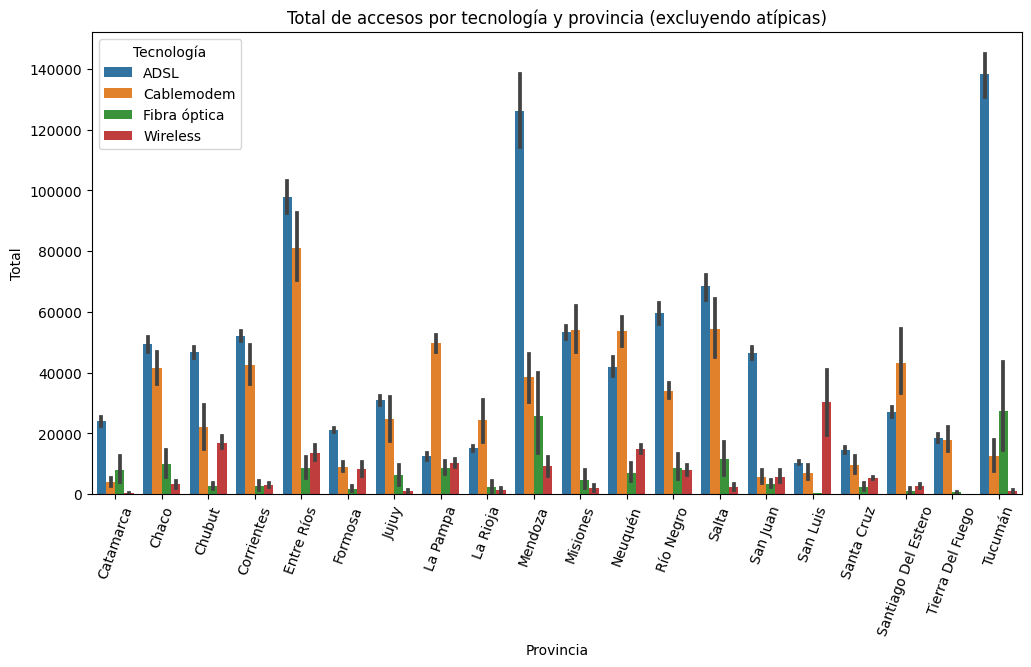

In [42]:
# Lista de tecnologías que nos interesan
tecnologias = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless']

# Seleccionamos las columnas relevantes
columnas_relevantes = ['Provincia'] + tecnologias

# Creamos un nuevo DataFrame con las columnas relevantes
df_tecnologias = accesos_por_tecnologia_prov[columnas_relevantes]

# Filtramos las provincias atipicas
provincias_atipicas = ['Buenos Aires', 'Capital Federal', 'Córdoba', 'Santa Fe']
df_tecnologias = df_tecnologias[~df_tecnologias['Provincia'].isin(provincias_atipicas)]

# Utilizamos la función melt() para transformar el DataFrame
df_tecnologias_melted = df_tecnologias.melt(id_vars='Provincia', var_name='Tecnología', value_name='Total')

# Creamos el gráfico de barras con Seaborn
plt.figure(figsize=(12,6))
sns.barplot(data=df_tecnologias_melted, x='Provincia', y='Total', hue='Tecnología', hue_order=tecnologias)
plt.xlabel('Provincia')
plt.ylabel('Total')
plt.title('Total de accesos por tecnología y provincia (excluyendo atípicas)')
plt.xticks(rotation=70)
plt.show()

Podemos observar que provincias como `Entre Ríos`, `Mendoza`, `Salta` o `Tucumán` presentan una alta predominancia en el uso de tecnologías antiguas como el **`ADSL`**. Esto podría indicar que estas regiones aún no han experimentado una adopción significativa de tecnologías más avanzadas como la Fibra Óptica o el Cablemodem, que suelen ofrecer velocidades de conexión más altas y una mayor calidad de servicio. 

Tendremos esto en cuenta para la realizacion de **_KPIs_**

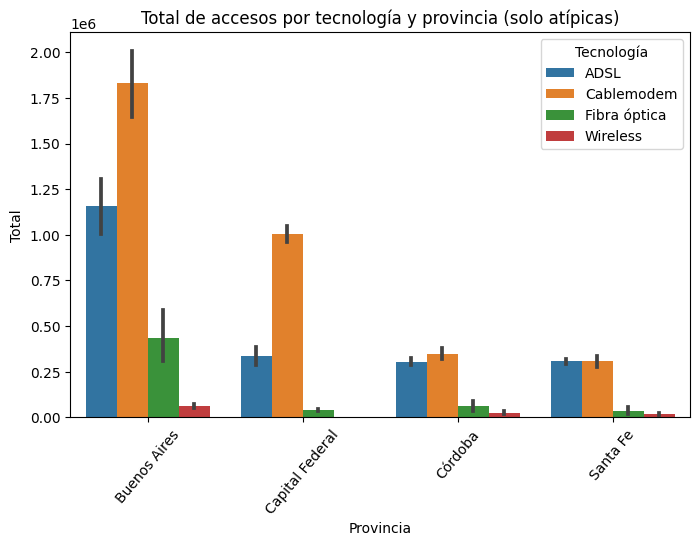

In [57]:
# Ahora solo vamos a mostrar las provincias atipicas
df_tecnologias = df_tecnologias[df_tecnologias['Provincia'].isin(provincias_atipicas)]

# Utilizamos la función melt() para transformar el DataFrame
df_tecnologias_melted = df_tecnologias.melt(id_vars='Provincia', var_name='Tecnología', value_name='Total')

# Creamos el gráfico de barras con Seaborn
plt.figure(figsize=(8,5))
sns.barplot(data=df_tecnologias_melted, x='Provincia', y='Total', hue='Tecnología', hue_order=tecnologias)
plt.xlabel('Provincia')
plt.ylabel('Total')
plt.title('Total de accesos por tecnología y provincia (solo atípicas)')
plt.xticks(rotation=50)
plt.show()

Al analizar las provincias con mayor población, se observa una transición significativa en sus preferencias tecnológicas. Aunque una parte considerable aún utiliza tecnologías más antiguas como **`ADSL`**, se evidencia un creciente cambio hacia tecnologías más avanzadas, como Cablemodem. En particular, en la provincia de **`Buenos Aires`** se destaca una notable adopción de **`Fibra Óptica`**, indicando una clara tendencia hacia conexiones de mayor velocidad y rendimiento.

Esta tendencia hacia tecnologías más avanzadas refleja la creciente demanda de servicios de internet de alta calidad y velocidad en áreas urbanas y densamente pobladas. El mayor acceso a infraestructuras de red más modernas y la disponibilidad de planes y ofertas atractivas podrían estar impulsando esta transición tecnológica.

Vamos a tener esto en cuenta en la realizacion de *_KPIs_*

In [40]:
# accesos_por_tecnologia_prov.to_csv("./_src/datasets_pbi/accesos_por_tecnologia_prov.csv",index=False)

### internet_ingresos 

In [6]:
historico_velocidad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Año                        35 non-null     int64 
 1   Trimestre                  35 non-null     int64 
 2   Ingresos (miles de pesos)  35 non-null     object
dtypes: int64(2), object(1)
memory usage: 968.0+ bytes


In [7]:
historico_velocidad.head()

,Año,Trimestre,Ingresos (miles de pesos)
0,2022,3,67.055.930
1,2022,2,60.335.724
2,2022,1,55.589.997
3,2021,4,45.467.887
4,2021,3,42.999.944


Al igual que en accesos_por_tecnologia, vamos a transformar la columna de Ingresos (miles de pesos) y a eliminar la columna Periodo pues ya la tenemos dividida en Año y Trimestre


In [9]:
historico_velocidad.drop(columns="Periodo",inplace=True)
historico_velocidad = transform_to_numeric(historico_velocidad,["Ingresos (miles de pesos)"])

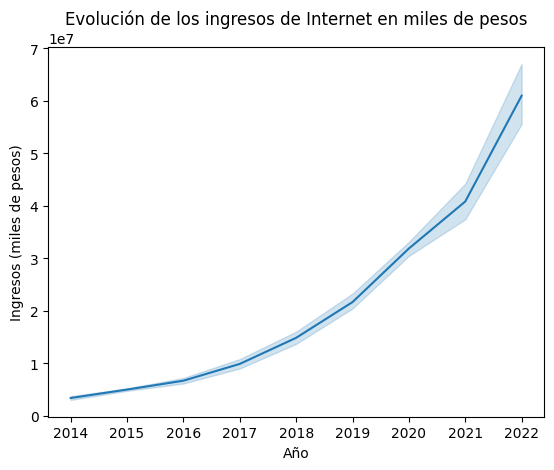

In [10]:
# Gráfico de línea en Seaborn
sns.lineplot(data=historico_velocidad, x='Año', y='Ingresos (miles de pesos)')
plt.xlabel('Año')
plt.ylabel('Ingresos (miles de pesos)')
plt.title('Evolución de los ingresos de Internet en miles de pesos')
plt.show()

Podemos observar que, a partir del año 2018, los ingresos de los servicios de telecomunicacion comenzaron a aumentar debido a la preferencia de contratar servicios mas avanzados. 

In [39]:
# internet_ingresos.to_csv("./_src/datasets_pbi/internet_ingresos.csv",index=False)

### internet_penetracion

In [40]:
internet_penetracion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Año                           840 non-null    int64 
 1   Trimestre                     840 non-null    int64 
 2   Provincia                     840 non-null    object
 3   Accesos por cada 100 hogares  840 non-null    object
dtypes: int64(2), object(2)
memory usage: 26.4+ KB


In [41]:
internet_penetracion.head()

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2022,3,Buenos Aires,"78,11"
1,2022,3,Capital Federal,"122,28"
2,2022,3,Catamarca,"65,33"
3,2022,3,Chaco,"43,86"
4,2022,3,Chubut,"84,38"


Observemos que tenemos la columna `Accesos por cada 100 hogares` como _string_ en vez de _numerica_. Vamos a transformarla para poder realizar analisis estadisticos mas precisos


In [42]:
internet_penetracion["Accesos por cada 100 hogares"] = internet_penetracion["Accesos por cada 100 hogares"].str.replace(",",".")
internet_penetracion["Accesos por cada 100 hogares"] = pd.to_numeric(internet_penetracion["Accesos por cada 100 hogares"])

Utilicemos un diagrama de caja para  analizar la distribución de la penetración de Internet en los hogares.
Este enfoque nos permitirá visualizar y examinar la variabilidad en la adopción de Internet en diferentes provincias, identificando posibles diferencias significativas, valores atipicos y situaciones inusuales.

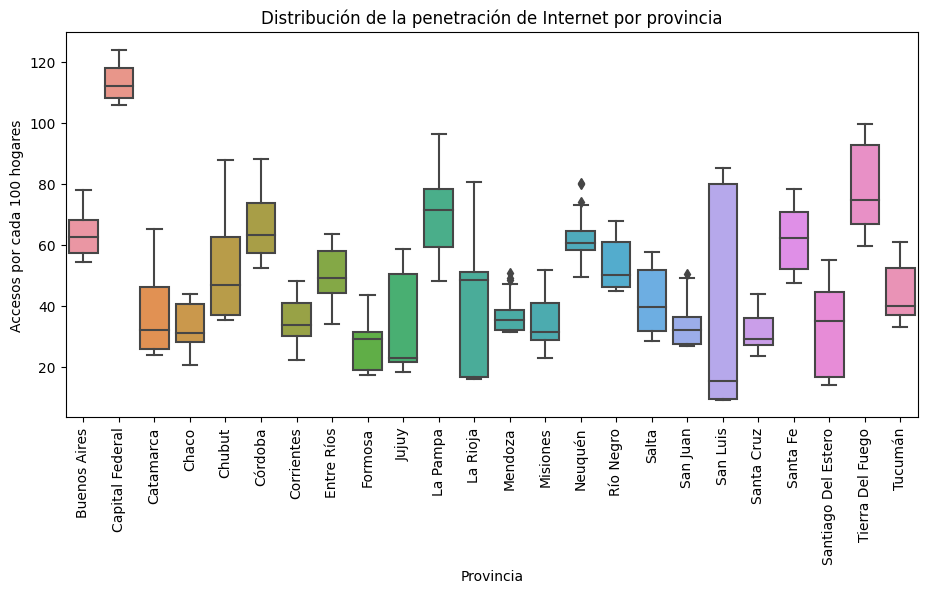

In [43]:
# Diagrama de caja en Seaborn
plt.figure(figsize=(11, 5))
sns.boxplot(data=internet_penetracion, x='Provincia', y='Accesos por cada 100 hogares')
plt.xlabel('Provincia')
plt.ylabel('Accesos por cada 100 hogares')
plt.title('Distribución de la penetración de Internet por provincia')
plt.xticks(rotation=90)
plt.show()

Al analizar el diagrama de caja resultante, se puede observar visualmente que las provincias de `Mendoza`, `Neuquén` y `San Juan` presentan **valores atípicos** Y que la provincia de `La Rioja` destaca por tener una mediana alta, lo que sugiere una mayor penetración generalizada de Internet. En cambio, las provincias de `San Luis` y `Jujuy` presentan una dispersión significativa en la adopción, con áreas de alta y baja penetración.

Además, podemos destacar que la provincia de `Capital Federal` muestra una posición considerablemente más alta en términos de accesos en comparación con las demás provincias. Esto nos permite implementar estrategias específicas y promover el crecimiento de la conectividad en áreas específicas

In [44]:
# Finalizamos llevando el dataset limpio a un csv 
# internet_penetracion.to_csv("./_src/datasets_pbi/internet_penetracion.csv",index=False)

### accesos_por_velocidad

In [4]:
accesos_por_velocidad.head()

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
0,2022,3,Buenos Aires,29.985,27.709,290.315,297.915,267.044,124.190,3.618.689,65.821,4.721.668
1,2022,3,Capital Federal,517,5.742,34.371,67.829,51.946,28.692,1.253.105,105.477,1.547.679
2,2022,3,Catamarca,71,384,3.107,5.389,5.099,3.737,50.298,2.208,70.293
3,2022,3,Chaco,461,987,16.782,18.938,8.049,15.828,79.390,3.711,144.146
4,2022,3,Chubut,109,1.444,45.707,30.940,34.682,15.309,17.563,20.024,165.778


In [5]:
accesos_por_velocidad.drop(columns="OTROS",inplace=True)

In [6]:
columnas_numericas = ["Año","Trimestre",'HASTA 512 kbps','+ 512 Kbps - 1 Mbps',
                      '+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps','+ 10 Mbps - 20 Mbps',
                      '+ 20 Mbps - 30 Mbps', '+ 30 Mbps','Total']


In [9]:
accesos_por_velocidad = transform_to_numeric(accesos_por_velocidad,columnas_numericas)

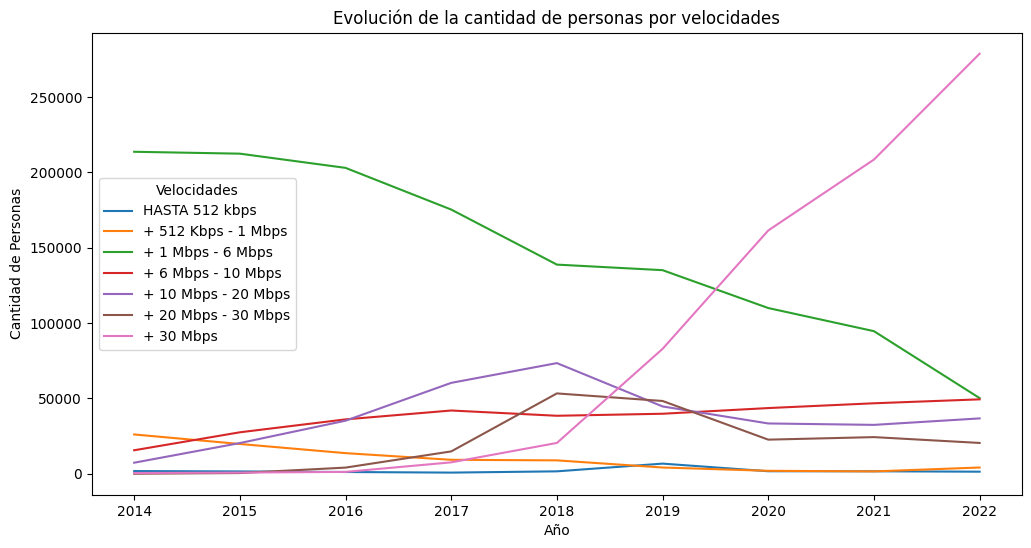

In [54]:
velocidades = ['HASTA 512 kbps','+ 512 Kbps - 1 Mbps',
                      '+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps','+ 10 Mbps - 20 Mbps',
                      '+ 20 Mbps - 30 Mbps', '+ 30 Mbps']
plt.figure(figsize=(12,6))
for i in velocidades:    
    sns.lineplot(data=accesos_por_velocidad, x='Año', y=i,label=i,ci=None)
plt.xlabel('Año')
plt.ylabel('Cantidad de Personas')
plt.title('Evolución de la cantidad de personas por velocidades')
plt.legend(title='Velocidades')
plt.show()

Se puede observar que tambien al igual que lo anteriormente analizado, a partir del año 2018, se produjo un notable cambio en las preferencias de los usuarios al contratar servicios de telecomunicaciones, con una clara tendencia por velocidades superiores a 30 Mbps, mientras que la demanda por otros servicios de menor velocidad experimentó un declive significativo.

In [11]:
# accesos_por_velocidad.to_csv("./_src/datasets_pbi/accesos_por_velocidad.csv",index=False)

### ***CONCLUSIONES GENERALES PARA LOS KPIs***

>* **_Evolución positiva en la demanda de servicios avanzados_**: Se observa un aumento constante en la media de descarga de Mbps, reflejando la creciente preferencia de los usuarios por servicios de telecomunicaciones más avanzados. Esto sugiere una mayor demanda de soluciones tecnológicas de alta velocidad y calidad.

>* **_Consolidación de tecnologías avanzadas_**: Tecnologías como Cablemodem y Fibra Óptica (especialmente esta ultima) han experimentado un aumento significativo desde 2018,especialmente en provincias densamente pobladas, mientras que tecnologias antiguas como ADSL ha disminuido en todas las provincias.

>* **_Impulso a los ingresos del sector:_**: Los ingresos de Internet aumentaron a partir de 2018, posiblemente debido a la preferencia creciente por servicios avanzados y de mayor calidad, generando mayor valor en el sector

### Teniendo esto en cuenta  vamos a crear algunas metricas para poder plantear los KPIs: 

In [2]:
historico_velocidad         = pd.read_csv("./_src/datasets_pbi/historico_velocidad_prov.csv") 
accesos_por_velocidad       = pd.read_csv("./_src/datasets_pbi/accesos_por_velocidad.csv")
internet_ingresos           = pd.read_csv("./_src/datasets_pbi/internet_ingresos.csv")

#### Vamos a realizar 3 metricas distintas para la realizacion de los KPIs

Hagamos un analisis del crecimiento en cuanto a porcentaje del uso de la Fibra Optica

In [45]:
porcentaje_fibras = []
for i in range(2014, 2022):
    porcentaje = round(accesos_por_tecnologia.groupby('Año')['Fibra óptica'].mean()[i + 1] / accesos_por_tecnologia.groupby('Año')['Fibra óptica'].mean()[i] - 1,2)*100
    porcentaje_fibras.append(porcentaje)
    print(f"De {i} a {i+1} crecio un ", porcentaje, "%")
print("Un promedio de ",sum(porcentaje_fibras)/len(porcentaje_fibras),"%")

De 2014 a 2015 crecio un  3.0 %
De 2015 a 2016 crecio un  10.0 %
De 2016 a 2017 crecio un  13.0 %
De 2017 a 2018 crecio un  41.0 %
De 2018 a 2019 crecio un  196.0 %
De 2019 a 2020 crecio un  45.0 %
De 2020 a 2021 crecio un  40.0 %
De 2021 a 2022 crecio un  61.0 %
Un promedio de  51.125 %



Veamos ahora la evolucion porcentual de los ingresos

In [51]:
ingresos = []
for i in range(2014, 2022):
    porcentaje = round(internet_ingresos.groupby('Año')['Ingresos (miles de pesos)'].mean()[i + 1] / internet_ingresos.groupby('Año')['Ingresos (miles de pesos)'].mean()[i] - 1,2) * 100
    ingresos.append(porcentaje)
    print(f"De {i} a {i+1} crecio un ", porcentaje, "%")
print("Un promedio de ",sum(ingresos)/len(ingresos),"%")

De 2014 a 2015 crecio un  47.0 %
De 2015 a 2016 crecio un  34.0 %
De 2016 a 2017 crecio un  48.0 %
De 2017 a 2018 crecio un  50.0 %
De 2018 a 2019 crecio un  46.0 %
De 2019 a 2020 crecio un  47.0 %
De 2020 a 2021 crecio un  28.000000000000004 %
De 2021 a 2022 crecio un  49.0 %
Un promedio de  43.625 %


Por ultimo, veamos el crecimiento porcentual de la velocidad promedio en Mbpsla evolucion porcentual de los ingresos

In [4]:
vel_promedio = []
for i in range(2014, 2021):
    porcentaje = round(historico_velocidad.groupby('Año')['Mbps (Media de bajada)'].mean()[i + 1] / historico_velocidad.groupby('Año')['Mbps (Media de bajada)'].mean()[i] - 1,2) * 100
    vel_promedio.append(porcentaje)
    print(f"De {i} a {i+1} crecio un ", porcentaje, "%")
print("Un promedio de ",sum(vel_promedio)/len(vel_promedio),"%")

De 2014 a 2015 crecio un  23.0 %
De 2015 a 2016 crecio un  16.0 %
De 2016 a 2017 crecio un  31.0 %
De 2017 a 2018 crecio un  55.00000000000001 %
De 2018 a 2019 crecio un  44.0 %
De 2019 a 2020 crecio un  57.99999999999999 %
De 2020 a 2021 crecio un  28.999999999999996 %
Un promedio de  36.57142857142857 %


Con estas metricas en cuenta podemos concluir que los KPIs seran los siguientes:
1. Aumentar en 52 % el uso de tecnologias mas avanzadas _(Fibra Óptica)_ para el siguiente año a nivel nacional
2. Aumentar en 45 % los ingresos para el siguiente año
3. Aumentar en 35 % la velocidad media para el proximo año a nivel nacional